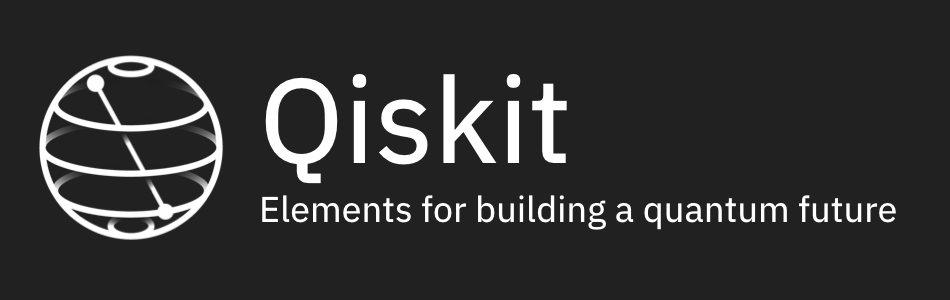

# Ignis Logging
---

* **Last Updated:** August 4, 2019
* **Requires:** qiskit-ignis 0.2

# Introduction

This tutorial shows how to use logging in Ignis. The purpose of Ignis logging is twofold:
1. Log run-time events and emit messages to the console.
2. Log data of interest to a file. 

Ignis logging is based on [Python's logging package](https://docs.python.org/3/library/logging.html). There are 3 classes in the Ignis logging module: 

* **IgnisLogger** - Objects of this class are used for logging. The class is derived from the Logger class defined in the Python's logging package.
* **IgnisLogging** - A singleton class responsible for configuring logging behavior in Ignis as well as for creating  IgnisLogger objects.
* **IgnisLogReader** - A class for reading file logs created by IgnisLogger objects, containing filtering capabilities support.


## Using IgnisLogger

In this section we will see how to log data to console and files using `IgnisLogger` objects.

### Creating a logger object
Console and file logging in Ignis is performed using an object of the class `IgnisLogger`. Such an object is essentially a `Logger` object of the [Python's logging package](https://docs.python.org/3/library/logging.html), extended with a convenient file logging capability. 

Let's create such an object:

In [1]:
from qiskit.ignis.logging import ignis_logging

logger = ignis_logging.IgnisLogging().get_logger(__name__)

You can see here the use of the `IgnisLogging` singleton class for getting an `IgnisLogger` object. The parameter for the `get_logger` method gives the logger its name. This name is used when messages are printed to the console, to identify the source file which the log was printed from. 

### Logging to console

Logging to console using an `IgnisLogger` object is identical to using [Python's logging package](https://docs.python.org/3/library/logging.html). For convenience, here are some examples:



In [2]:
logger.info("An info message") # wont show by default
logger.warning("This is a warning")
logger.error("An error message")
logger.critical("Critical error")


ERROR: __main__ - An error message
CRITICAL: __main__ - Critical error


#### Configuring console logging
Essentially, console logging in Ignis is identical to python logging. For the most part, the important aspect to consider when using Python logging is message levels. There are 5 pre-defined message levels in Python logging, as listed below, in ascending order of severity:

DEBUG <br>
INFO <br>
WARNING <br>
ERROR <br>
CRITICAL <br>

The default message level in Python logging is WARNING, meaning all messages of WARNING severity or higher will be logged to the console. This is why the INFO message in the example above was not printed. You can set the severity level using the following code:



In [3]:
import logging
logger.setLevel(logging.INFO)
logger.info("This will be printed now")

INFO: __main__ - This will be printed now


For complete documentation on Python logging, see [here](https://docs.python.org/3/library/logging.html).

### Logging to file

Logging to file is carried out by using the `log_to_file` method of the `IgnisLogger` class. The method expects key-value pairs given as Python keyword parameters. Any number of key-value pairs can be given to the method. Each call to the `log_to_file` method results in a new line being appended and stored in the log file. Each line contains a timestamp, an identifying name and list of key-value pairs. Here are a few examples:

In [4]:
logger.log_to_file(t1=0.1, t2='0.3')
logger.log_to_file(qubits=[0,1,3], fidelity=.9998)
logger.log_to_file(dictionary={'a':1, 'b':2})

File logging is disabled: no config file


And this is how these are logged in the log file:

``
2019/06/02 11:36:28 ignis_logging 't1':'0.1' 't2':'0.3' 
2019/06/02 11:36:28 ignis_logging 'qubits':'[0, 1, 3]' 'fidelity':'0.9998' 
2019/06/02 11:36:28 ignis_logging 'dictionary':'{'a': 1, 'b': 2}
``

Notice how the data is stored:
Each key-value pair is separated by a colon (:), the pairs are separated by space and all keys and values are put in single quotes ('). This makes it easy to import the data into a CSV or other regular data formats. 

### Configuring the IgnisLogger

Besides creating `IgnisLogger` objects, the `IgnisLogger` class is used to configure the file logging aspects in Ignis.  The main aspects controlled by the `IgnisLogger` class are:

* Enabling/disabling file logging.
* Location of the log files.
* Miscellaneous log file controls. 

The main vehicle for configuring Ignis logging is a configuration file, named *logging.yaml*, whose full path is expected by `IgnisLogger` to be:

``
<USER HOME DIR>/.qiskit/logging.yaml
``

An example configuration file is located in the logging directory of Ignis. You can use this file as a starting point. 

The main settings in the configuration file are as follow:

```yaml
file_logging: true		# Enables/disables file logging (true/false)
log_file: ignis_test_log.log	# Name of the file log
max_size: 1000000		# Max file size (in bytes). 
max_rotations: 5		# Max number of file rotations
```

The max_size and max_rotations settings are used in conjunction with each other to limit the amount of disk space used for logging. Up to max_rotations files will be stored on disk, each of which is limited to max_size bytes in size, such that the most recent max_size * max_rotations bytes are stored in one or more log files. Rotated file names' are automatically suffixed with numbers. 

File logging can be enabled or disabled either by using the logging configuration file or by calling the `enable_file_logging` or `disable_file_logging` methods of `IgnisLogger`, respectively. 

Note: File logging is disabled by default if no logging configuration file is provided. Enabling file logging without using a configuration file (i.e. programatically) results in `IgnisLogging` using its internal file logging default settings.



## IgnisLogReader

The Ignis logging module comes with a log reader class called `IgnisLogReader`. The purpose of `IgnisLogReader` is to retrieve log data from Ignis log files in such a way that it can be further processed and analyzed. In essence, `IgnisLogReader` returns a list of lists, each of which contains a list of key-value pairs. 

Note: since any data can be stored using `IgnisLogger`'s `log_to_file` method, it is up to the user to correctly interpret the logged data when using the `IgnisLogReader` class. 

### Reading log data
The most basic usage of the `IgnisLogReader` is to retrieve all the data stored in the log file (or multiple files, in case of file rotations). Here is how this can be achieved: 

In [5]:
log_reader = ignis_logging.IgnisLogReader()
rows = log_reader.read_values()
print(*rows, sep="\n")

Note how the data is retrieved as a list of lists. In addition, when a logging configuration file is used, `IgnisLogReader` will automatically read the log files as defined in the configuration file. You can specify a custom log file to read from using the log_file parameter of the `read_values` method.

#### Filtering by date and time
`IgnisLogReader` supports date/time based filtering. You can specify a to and a from date/time, as well as a from-to range by combining both to and from datetime specifications. Here are a couple example:

In [6]:
rows = log_reader.read_values(from_datetime="2019/06/02 11:36:25")
print(*rows, sep="\n")

In [7]:
from datetime import datetime
to_dt = datetime.strptime("02/06/19 11:36:25", "%d/%m/%y %H:%M:%S")
rows = log_reader.read_values(from_datetime="2019/06/02 11:36:25", to_datetime=to_dt)
print(*rows, sep="\n")

Note how the date/time parameters can handle both date/time strings as well as datetime objects. 
#### Filtering by key names
You can also ask `IgnisLogReader` to retrieve only key-values pairs of specific keys. Use the _keys_ parameter of the `read_values` method to achieve that. For example: 

In [8]:
rows = log_reader.read_values(keys="t1")
print(*rows, sep="\n")


In [9]:
rows = log_reader.read_values(keys=["t2", "fidelity"], to_datetime=to_dt)
print(*rows, sep="\n")

Once retrieved you can convert the data into a csv object, pandas or any other format for further processing and visualization. 

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright